# 02 - EDA e Tratamento das Lojas

### Importação das bibliotecas utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Dataset - Lojas

In [3]:
store_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projects/Rossman Store/dataset/brutos/store.csv') #info sobre as Lojas

Dicionário de Variáveis - `store_df`

- **Store**: Identificador da loja (mesmo do dataset de vendas)  
- **StoreType**: Tipo da loja (`a`, `b`, `c`, `d`)  
- **Assortment**: Tipo de sortimento (também relacionado ao tipo da loja):  
  - `a` = básico  
  - `b` = extra  
  - `c` = estendido  
- **CompetitionDistance**: Distância (em metros) até a loja concorrente mais próxima  
- **CompetitionOpenSinceMonth**: Mês de abertura da loja concorrente  
- **CompetitionOpenSinceYear**: Ano de abertura da loja concorrente  
- **Promo2**: Promoção contínua e consecutiva em algumas lojas  
  - `0` = não participa  
  - `1` = participa  
- **Promo2SinceMonth**: Mês em que a Promo2 começou  
- **Promo2SinceYear**: Ano em que a Promo2 começou  
- **PromoInterval**: Meses (intervalos consecutivos) em que a Promo2 é ativa  

In [12]:
store_df.shape # 10 colunas/atributos e mil+ linhas/lojas


(1115, 10)

In [13]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
store_df.info() #há valores nulos!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# EDA - Lojas

<Axes: >

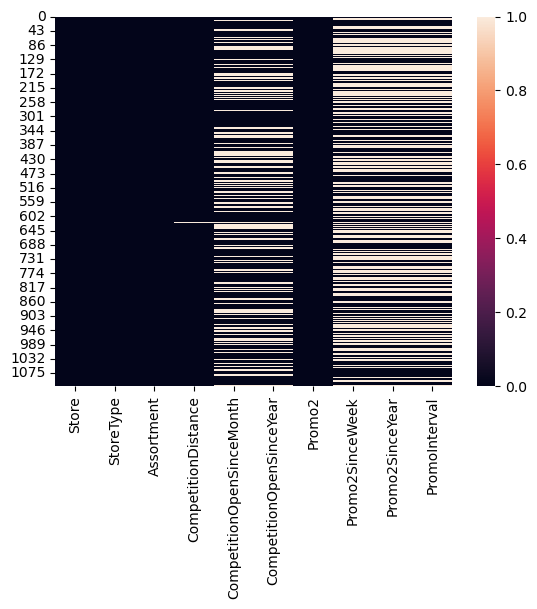

In [16]:
sns.heatmap(store_df.isnull()) #Indicando que há dados faltantes

In [17]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [18]:
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [19]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Observe que os índices dos meses com dados faltantes coincidem com os índices dos anos também ausentes. Portanto, se o mês não foi registrado, o respectivo ano também não foi.

In [21]:
store_df[store_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [22]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_df[str].fillna(0, inplace=True) #Substituindo todos os valores NaN (string) dos atributos por 0.

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_52801/480561461.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df[str].fillna(0, inplace=True) #Substituindo todos os valores NaN (string) dos atributos por 0.


<Axes: >

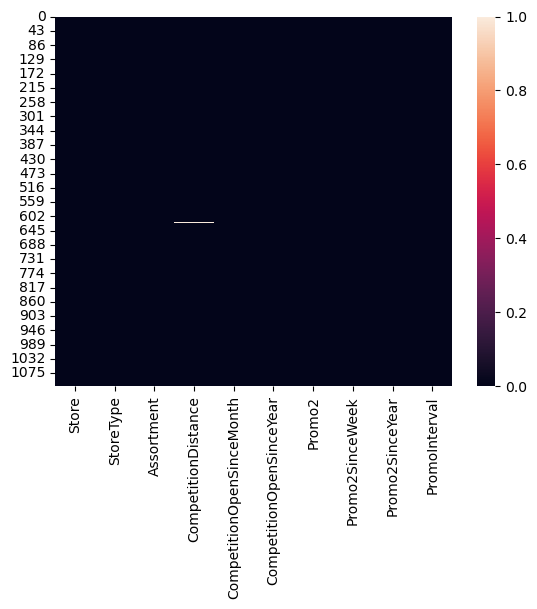

In [23]:
sns.heatmap(store_df.isnull())

In [24]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_52801/170787372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)


<Axes: >

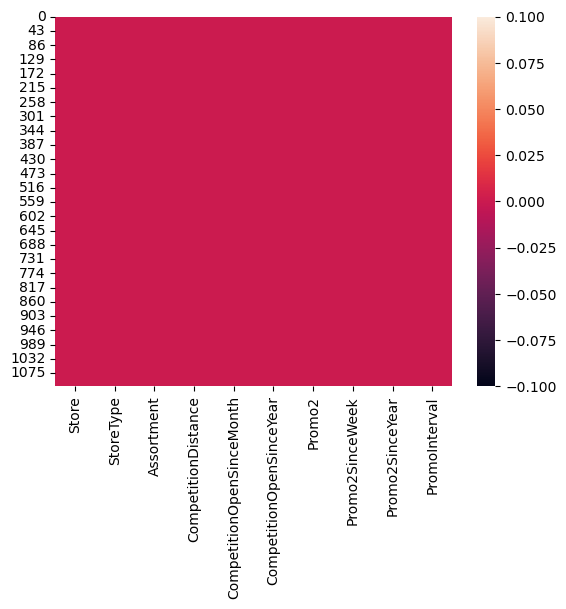

In [25]:
sns.heatmap(store_df.isnull())

In [26]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
store_df.to_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/storeOK_df.csv', index=False)

## Justificativa para o Tratamento de Dados Faltantes em `store_df`

---

### 1. Variáveis Categóricas e de Data Relacionadas a Promoções e Competição

Para as seguintes colunas, os valores NaN foram substituídos por `0`:
* `Promo2SinceWeek`
* `Promo2SinceYear`
* `PromoInterval`
* `CompetitionOpenSinceMonth`
* `CompetitionOpenSinceYear`

**Justificativa:**

* **`Promo2SinceWeek`, `Promo2SinceYear`, e `PromoInterval`**:
    * Estas colunas estão diretamente relacionadas à variável `Promo2`, que indica se uma loja participa de uma promoção contínua.
    * Observou-se que o número de valores ausentes (NaNs) nessas três colunas (544 ocorrências) correspondia exatamente ao número de lojas onde `Promo2` é igual a `0` (ou seja, a loja não participa da promoção).
    * Neste contexto, o valor `0` foi utilizado para significar **"não aplicável"** ou **"promoção não existente"** para aquela loja. Se uma loja não tem `Promo2`, as datas de início ou os intervalos dessa promoção são, de fato, irrelevantes. Esta é uma forma comum de lidar com dados faltantes que são condicionais a outra variável.
    * Para `PromoInterval`, que é uma coluna do tipo objeto (string), a substituição por `0` numérico foi uma decisão inicial. **Recomendação futura**: para manter a consistência do tipo de dado, poderia ser mais adequado substituir por uma string como `"Nenhum"` ou tratar o `0` como uma categoria específica durante a engenharia de features. 

* **`CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear`**:
    * Estas colunas indicam o mês e o ano de abertura do competidor mais próximo. Foram identificados 354 valores ausentes para ambas, e estes NaNs coincidem.
    * A substituição por `0` nestes casos é uma forma de **sinalizar a ausência de dados específicos sobre a data de abertura do competidor** ou, potencialmente, a ausência de um competidor próximo (especialmente para os 3 casos onde `CompetitionDistance` também era NaN).
    * **Importante**: O valor `0` não representa um mês ou ano válido. Portanto, ao utilizar estas colunas para cálculos (como a idade do competidor), este valor `0` deverá ser tratado como um **caso especial** ou um **flag** indicando "data desconhecida" ou "sem competidor". Esta abordagem permite manter os registros no dataset, mas requer atenção em etapas subsequentes para evitar interpretações errôneas (ex: um ano 0 resultando em uma idade de competição extremamente grande e sem sentido).

---

### 2. `CompetitionDistance`

Para a coluna `CompetitionDistance`, que representa a distância em metros para o competidor mais próximo e possuía 3 valores ausentes, optou-se por preencher os NaNs com a **média** da coluna.

`store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)`

**Justificativa:**

* **Pequena Quantidade de NaNs:** Com apenas 3 valores ausentes em um total de 1115 lojas, o impacto da imputação no comportamento geral da variável é mínimo.
* **Manutenção da Estrutura do Dado:** A imputação pela média permite que os registros sejam mantidos para análise sem introduzir um viés significativo, assumindo que as lojas com dados faltantes têm uma distância de competição que, em média, não destoa radicalmente das demais.
* **Simplicidade e Praticidade:** É uma técnica de imputação direta e fácil de implementar, sendo uma escolha comum para preencher poucos valores numéricos faltantes.
* **Consideração (Mediana vs. Média):** Embora a média seja sensível a outliers, com apenas 3 valores sendo imputados, a diferença entre usar a média ou a mediana (que é mais robusta a outliers) provavelmente seria desprezível. A escolha pela média é aceitável neste cenário. A intenção é preencher o valor com um dado central da distribuição existente.

---


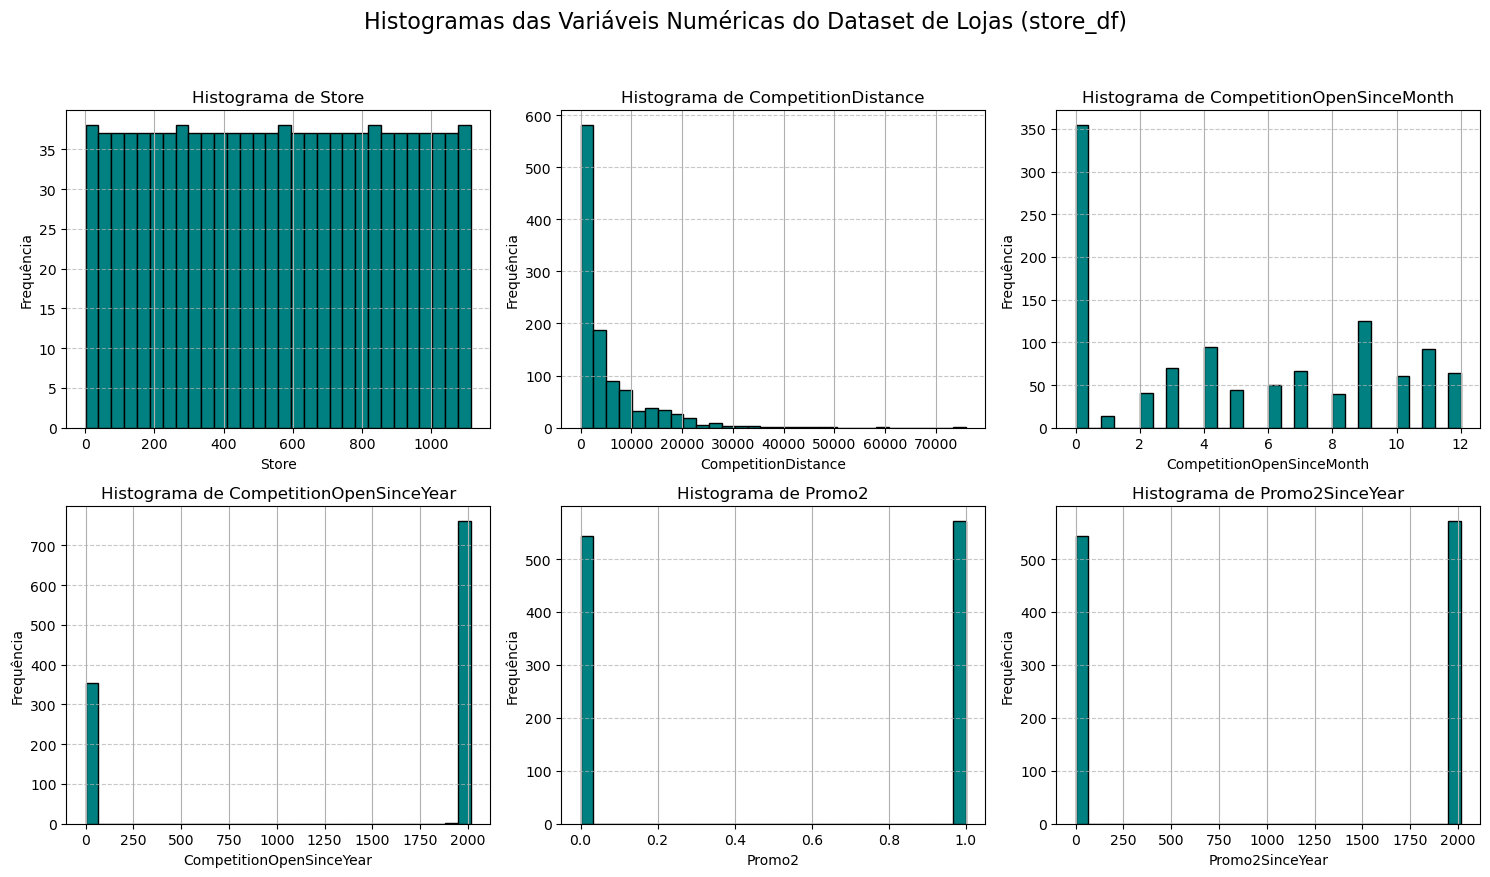

In [27]:
numerical_cols_store_df = [
    'Store',
    'CompetitionDistance',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2',
    'Promo2SinceYear'
]

# Criar uma cópia do dataframe apenas com as colunas selecionadas para histograma
# (Para garantir que não estamos modificando o store_df original dentro desta lógica de plotagem)
store_df_for_hist = store_df[numerical_cols_store_df].copy()

# 2. Definir o número de colunas e linhas para a grade de subplots
n_cols_grid = 3  # Número de colunas na grade (mesmo estilo do vendas_df)
n_rows_grid = math.ceil(len(store_df_for_hist.columns) / n_cols_grid)

# 3. Criar a figura e a grade de subplots
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(15, n_rows_grid * 4.5)) # Ajuste de altura similar

# Ajustar axes para ser iterável em todos os casos (se for uma única linha/coluna)
if n_rows_grid == 1 and n_cols_grid == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# 4. Iterar pelas colunas numéricas e plotar os histogramas
for i, column_name in enumerate(store_df_for_hist.columns):
    ax = axes[i]
    store_df_for_hist[column_name].hist(ax=ax, bins=30, edgecolor='black', color='teal') # Cor pode ser ajustada
    ax.set_title(f'Histograma de {column_name}', fontsize=12)
    ax.set_xlabel(column_name, fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Ocultar subplots vazios, se houver
for j in range(len(store_df_for_hist.columns), len(axes)):
    fig.delaxes(axes[j])

# 6. Otimizar o layout para evitar sobreposição e adicionar título geral
fig.suptitle('Histogramas das Variáveis Numéricas do Dataset de Lojas (store_df)', fontsize=16, y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar para o suptitle

plt.show()


## Análise de cada histograma:

### Análise dos Histogramas do Dataset de Lojas (`store_df`)

---

## 1. `Store`
O dataset `store_df` possui uma entrada única para cada loja. A uniformidade neste histograma, que agrupa os IDs das lojas em `bins` (intervalos), indica que os IDs estão distribuídos de forma relativamente contínua e que cada `bin` de IDs contém um número similar de lojas. Isso confirma a presença de dados para a totalidade das lojas ou para faixas de IDs de forma equilibrada.

---

## 2. `CompetitionDistance`
A distribuição para `CompetitionDistance` é **acentuadamente assimétrica à direita**. Observa-se uma alta concentração de valores (frequência) para distâncias menores, com uma cauda longa que se estende para distâncias maiores.
Isso sugere que a maioria das lojas tem competidores localizados relativamente próximos. Lojas com competidores muito distantes são menos comuns. O preenchimento dos 3 valores NaN pela média provavelmente teve um impacto visual desprezível na forma geral desta distribuição.

---

## 3. `CompetitionOpenSinceMonth`
O histograma é caracterizado por um **pico muito significativo no valor 0**. Os demais valores, representando os meses de 1 a 12, possuem frequências consideravelmente menores e variáveis entre si. O grande pico em `0` é consequência direta do preenchimento dos 354 NaNs com este valor. Este `0` serve como um indicador para os casos em que o mês de abertura do competidor era desconhecido ou, possivelmente, onde não havia um competidor próximo (se correlacionado com a ausência original de `CompetitionDistance`). Para as lojas com dados válidos (1-12), o histograma mostra a distribuição da frequência de abertura de competidores ao longo dos meses do ano.

---

## 4. `CompetitionOpenSinceYear`
Assim como `CompetitionOpenSinceMonth`, este histograma apresenta um **pico expressivo no valor 0**. Para os anos diferentes de zero (e.g., 1990, 2000, 2010, etc.), as barras são mais baixas. As barras para anos não nulos parecem estar mais concentradas em valores mais altos (anos mais recentes), embora os rótulos do eixo x (0, 250, ..., 2000) dificultem a leitura precisa dos anos específicos. O valor `0` representa predominantemente os casos onde o ano de abertura do competidor não estava disponível ou não era aplicável. Para os competidores com ano de abertura conhecido, o gráfico mostra a distribuição ao longo dos anos, sugerindo uma concentração em anos mais recentes.

---

## 5. `Promo2`
Sendo uma variável binária, o histograma exibe duas barras: uma para o valor `0` (loja não participa da Promo2) e outra para o valor `1` (loja participa). A barra correspondente ao valor `1` é ligeiramente mais alta que a barra para o valor `0`. Isso indica que há um número um pouco maior de lojas que participam da promoção contínua (Promo2) em comparação com as que não participam. Especificamente, 571 lojas têm `Promo2 = 1`, enquanto 544 lojas têm `Promo2 = 0`.

---

## 6. `Promo2SinceWeek`
O histograma é dominado por um **pico muito alto no valor 0**. Os valores restantes, que representam as semanas do ano (provavelmente de 1 a ~52), exibem frequências bem menores e distribuídas. O pico em `0` reflete o preenchimento dos NaNs para as 544 lojas que não participam da `Promo2` (`Promo2 == 0`), indicando que a semana de início da Promo2 não se aplica a elas. Para as lojas que efetivamente participam da `Promo2`, o histograma mostra a distribuição das semanas em que iniciaram essa promoção.

---

## 7. `Promo2SinceYear`
De forma similar à `Promo2SinceWeek`, este histograma apresenta um **pico massivo no valor 0**. Para os anos não nulos (provavelmente entre 2009 e 2015), as frequências são muito menores. As barras para anos não nulos estão agrupadas na extremidade direita da faixa de valores não nulos, indicando anos mais recentes. O valor `0` representa as lojas que não participam da `Promo2`. Para as lojas que aderiram, o gráfico ilustra a distribuição dos anos em que começaram a participar da `Promo2`, com uma aparente concentração nos anos mais recentes dentro do período coberto pelos dados.

---

In [28]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7652.849306,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


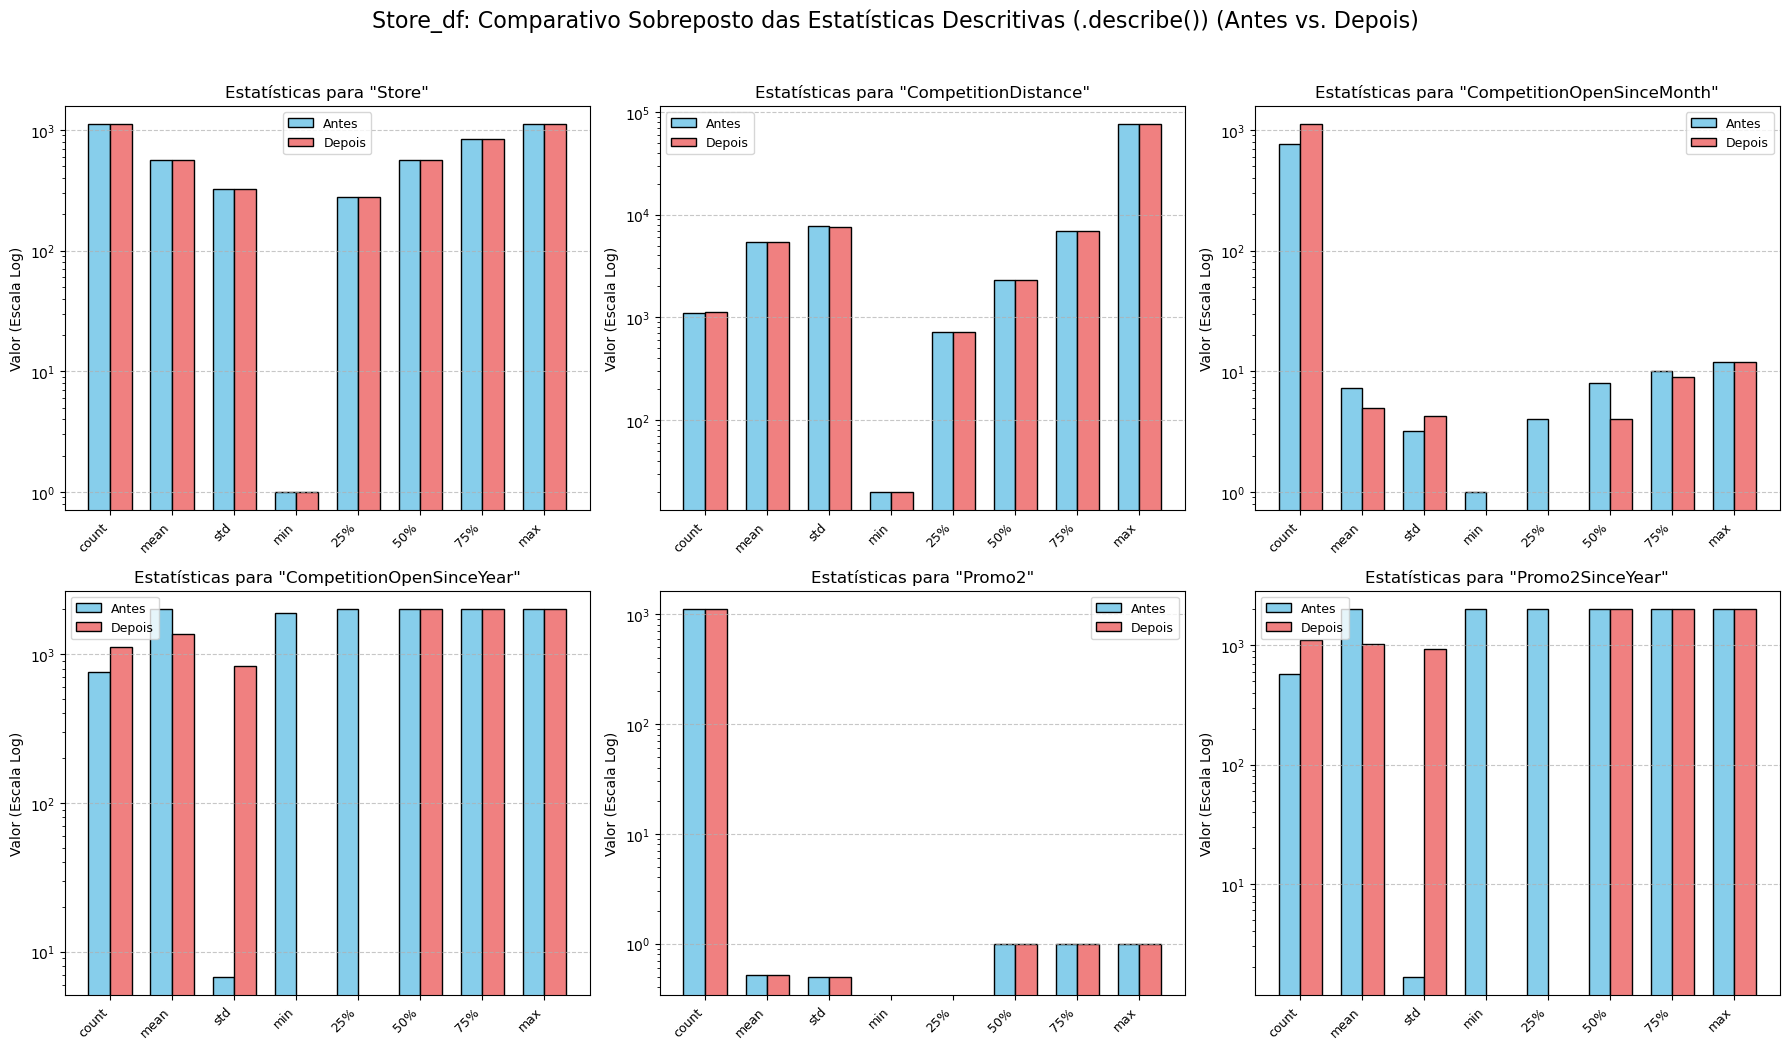

In [29]:
# Dados do describe() de store_df ANTES do pré-processamento
data_store_before_dict = {
    'Store': {'count': 1115.0, 'mean': 558.0, 'std': 322.017080, 'min': 1.0, '25%': 279.5, '50%': 558.0, '75%': 836.5, 'max': 1115.0},
    'CompetitionDistance': {'count': 1112.0, 'mean': 5404.901079, 'std': 7663.174720, 'min': 20.0, '25%': 717.5, '50%': 2325.0, '75%': 6882.5, 'max': 75860.0},
    'CompetitionOpenSinceMonth': {'count': 761.0, 'mean': 7.224704, 'std': 3.212348, 'min': 1.0, '25%': 4.0, '50%': 8.0, '75%': 10.0, 'max': 12.0},
    'CompetitionOpenSinceYear': {'count': 761.0, 'mean': 2008.660972, 'std': 6.789626, 'min': 1900.0, '25%': 2006.0, '50%': 2010.0, '75%': 2013.0, 'max': 2015.0},
    'Promo2': {'count': 1115.0, 'mean': 0.512108, 'std': 0.500078, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 1.0, 'max': 1.0},
    'Promo2SinceYear': {'count': 571.0, 'mean': 2011.763573, 'std': 1.673605, 'min': 2009.0, '25%': 2011.0, '50%': 2012.0, '75%': 2013.0, 'max': 2015.0}
}
desc_store_before_df = pd.DataFrame(data_store_before_dict)

# Dados do describe() de store_df DEPOIS do pré-processamento
data_store_after_dict = {
    'Store': {'count': 1115.0, 'mean': 558.0, 'std': 322.017080, 'min': 1.0, '25%': 279.5, '50%': 558.0, '75%': 836.5, 'max': 1115.0},
    'CompetitionDistance': {'count': 1115.0, 'mean': 5404.901079, 'std': 7652.849306, 'min': 20.0, '25%': 720.0, '50%': 2330.0, '75%': 6875.0, 'max': 75860.0},
    'CompetitionOpenSinceMonth': {'count': 1115.0, 'mean': 4.930942, 'std': 4.284924, 'min': 0.0, '25%': 0.0, '50%': 4.0, '75%': 9.0, 'max': 12.0},
    'CompetitionOpenSinceYear': {'count': 1115.0, 'mean': 1361.672646, 'std': 832.201390, 'min': 0.0, '25%': 0.0, '50%': 2005.0, '75%': 2011.0, 'max': 2015.0},
    'Promo2': {'count': 1115.0, 'mean': 0.512108, 'std': 0.500078, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 1.0, 'max': 1.0},
    'Promo2SinceYear': {'count': 1115.0, 'mean': 1031.252018, 'std': 931.671073, 'min': 0.0, '25%': 0.0, '50%': 2009.0, '75%': 2013.0, 'max': 2015.0}
}
desc_store_after_df = pd.DataFrame(data_store_after_dict)

# Configuração do plot
# Colunas para plotar (as que estão presentes em ambos e são numéricas no describe)
columns_to_plot = desc_store_before_df.columns.tolist()
stats_to_plot = desc_store_before_df.index.tolist()

ncols_grid = 3
nrows_grid = int(np.ceil(len(columns_to_plot) / ncols_grid))

fig, axes = plt.subplots(nrows=nrows_grid, ncols=ncols_grid, figsize=(18, nrows_grid * 5.5))
axes = axes.flatten()

# Configuração das barras
bar_width = 0.35
x_pos_stats = np.arange(len(stats_to_plot))

# Plotar cada coluna
for i, col_name in enumerate(columns_to_plot):
    ax = axes[i]

    # Obter valores antes e depois
    values_before = desc_store_before_df[col_name]
    # .get() é usado caso alguma coluna estivesse no 'before' mas não no 'after' (não é o caso aqui)
    values_after = desc_store_after_df.get(col_name, pd.Series(np.nan, index=stats_to_plot))

    # Plotar barras
    ax.bar(x_pos_stats - bar_width/2, values_before, bar_width, label='Antes', color='skyblue', edgecolor='black')
    ax.bar(x_pos_stats + bar_width/2, values_after, bar_width, label='Depois', color='lightcoral', edgecolor='black')

    # Configurar rótulos e aparência
    ax.set_title(f'Estatísticas para "{col_name}"', fontsize=12)
    ax.set_ylabel('Valor', fontsize=10)
    ax.set_xticks(x_pos_stats)
    ax.set_xticklabels(stats_to_plot, rotation=45, ha="right", fontsize=9)
    ax.legend(fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # --- Heurística para escala logarítmica (mesma lógica usada para vendas_df) --- Opcional
    combined_values = pd.concat([values_before, values_after]).dropna()
    if not combined_values.empty:
        non_count_stats_series = combined_values.drop('count', errors='ignore').abs()
        non_count_stats_max = non_count_stats_series.max() if not non_count_stats_series.empty else 0.0
        if pd.isna(non_count_stats_max): non_count_stats_max = 0.0

        has_count = 'count' in combined_values.index
        current_count_val_for_comparison = 0.0
        if has_count:
            _counts_from_combined = combined_values.loc['count']
            if isinstance(_counts_from_combined, pd.Series):
                current_count_val_for_comparison = _counts_from_combined.max() if not _counts_from_combined.empty else 0.0
            else:
                current_count_val_for_comparison = _counts_from_combined
            if pd.isna(current_count_val_for_comparison): current_count_val_for_comparison = 0.0

        condition_large_count = False
        if has_count:
            if non_count_stats_max == 0 and current_count_val_for_comparison > 0:
                condition_large_count = True
            elif non_count_stats_max > 0 and current_count_val_for_comparison > non_count_stats_max * 10:
                condition_large_count = True

        min_abs_val = combined_values.abs().min() if not combined_values.abs().empty else 0.0
        if pd.isna(min_abs_val): min_abs_val = 0.0

        condition_large_max = False
        if pd.notna(non_count_stats_max) and non_count_stats_max > 1000:
             if pd.notna(min_abs_val) and min_abs_val >= 0:
                 condition_large_max = True

        if condition_large_count or condition_large_max:
            ax.set_yscale('log')
            ax.set_ylabel('Valor (Escala Log)', fontsize=10)
    # --- Fim da heurística ---

# Remover eixos não utilizados
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Configurar título e layout
fig.suptitle('Store_df: Comparativo Sobreposto das Estatísticas Descritivas (.describe()) (Antes vs. Depois)', fontsize=16) # Ajuste o y se necessário
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ajuste para o suptitle

plt.show()


## Análise do Gráfico Comparativo das Estatísticas de `store_df` (Antes vs. Depois do Pré-processamento)

---

### 1. Estatísticas para `"Store"`
* **`count`**: Permaneceu constante em 1115 para "Antes" e "Depois".
    * **Implicação**: Correto, pois o `store_df` tem uma entrada por loja e nenhuma loja foi removida; apenas valores internos foram preenchidos.
* **`mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Todos os valores para estas estatísticas permaneceram idênticos entre "Antes" e "Depois".
    * **Implicação**: A imputação de valores em *outras* colunas não afeta as estatísticas descritivas do identificador da loja (`Store ID`).

---

### 2. Estatísticas para `"CompetitionDistance"`
* **`count`**: Aumentou de 1112 (Antes) para 1115 (Depois).
    * **Implicação**: Os 3 valores NaN foram preenchidos com sucesso pela média.
* **`mean`**: Permaneceu praticamente idêntico (~5404.90).
    * **Implicação**: Esperado, pois os NaNs foram preenchidos com a própria média.
* **`std`**: Teve uma pequena redução de ~7663 (Antes) para ~7653 (Depois).
* **`min`, `max`**: Permaneceram os mesmos.
* **Quartis (`25%`, `50%`, `75%`)**: Apresentaram pequenas alterações. Por exemplo, a mediana (`50%`) mudou de 2325 para 2330.
    * **Implicação**: A imputação pela média, mesmo para poucos valores, pode afetar levemente o desvio padrão e os quartis, pois os valores imputados se concentram na média, podendo alterar a forma da distribuição sutilmente.

---

### 3. Estatísticas para `"CompetitionOpenSinceMonth"`
* **`count`**: Aumentou consideravelmente de 761 (Antes) para 1115 (Depois).
    * **Implicação**: Os 354 valores NaN foram preenchidos com `0`.
* **`mean`**: Diminuiu de ~7.22 (Antes) para ~4.93 (Depois).
* **`std`**: Aumentou de ~3.21 (Antes) para ~4.28 (Depois).
* **`min`**: Mudou de 1 (Antes) para 0 (Depois).
* **`25%`**: Mudou de 4 (Antes) para 0 (Depois).
* **`50%` (Mediana)**: Diminuiu de 8 (Antes) para 4 (Depois).
    * **Implicação**: O preenchimento de uma grande quantidade de NaNs com `0` impactou significativamente todas as estatísticas. O `0` (que não é um mês válido) agora influencia fortemente a média, mediana e introduz um novo mínimo. O aumento do desvio padrão reflete a introdução desses valores `0` distantes da média original dos meses válidos.

---

### 4. Estatísticas para `"CompetitionOpenSinceYear"`
* **`count`**: Aumentou de 761 (Antes) para 1115 (Depois).
    * **Implicação**: Os 354 valores NaN foram preenchidos com `0`.
* **`mean`**: Diminuiu drasticamente de ~2008.66 (Antes) para ~1361.67 (Depois).
* **`std`**: Aumentou enormemente de ~6.79 (Antes) para ~832.20 (Depois).
* **`min`**: Mudou de 1900 (Antes) para 0 (Depois).
* **`25%`**: Mudou de 2006 (Antes) para 0 (Depois).
* **`50%` (Mediana)**: Diminuiu de 2010 (Antes) para 2005 (Depois).
    * **Implicação**: Similar ao mês, preencher com `0` (que não é um ano válido neste contexto) alterou as estatísticas. A média e a mediana foram "puxadas" para baixo pelo grande número de zeros. O desvio padrão explodiu, indicando uma dispersão muito maior devido à presença de zeros junto com os anos reais (como 1900-2015). **Isso destaca a importância de tratar o `0` como um valor especial em análises futuras (se for o caso)**.

---

### 5. Estatísticas para `"Promo2"`
* **`count`, `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Todas estas estatísticas permaneceram idênticas entre "Antes" e "Depois".
    * **Implicação**: A coluna `Promo2` não tinha valores ausentes e não foi alterada diretamente pelo pré-processamento das outras colunas. Suas características estatísticas (refletindo uma variável binária) foram preservadas.

---

### 6. Estatísticas para `"Promo2SinceWeek"`
* **`count`**: Aumentou de 571 (Antes) para 1115 (Depois).
    * **Implicação**: Os 544 valores NaN (provavelmente de lojas com `Promo2 == 0`) foram preenchidos com `0`.
* **`mean`**: Diminuiu de ~23.60 (Antes) para ~12.10 (Depois).
* **`std`**: Aumentou ligeiramente de ~13.97 (Antes) para ~15.03 (Depois).
* **`min`**: Mudou de 1 (Antes) para 0 (Depois).
* **`25%` e `50%` (Mediana)**: Mudaram para valores menores (0 e 1 respectivamente) devido à introdução dos zeros.
    * **Implicação**: O preenchimento com `0` (para indicar "não aplicável" quando `Promo2 == 0`) impactou as medidas de tendência central e o mínimo. O desvio padrão aumentou um pouco devido à maior dispersão causada pelos zeros.

---

### 7. Estatísticas para `"Promo2SinceYear"`
* **`count`**: Aumentou de 571 (Antes) para 1115 (Depois).
    * **Implicação**: Os 544 NaNs foram preenchidos com `0`.
* **`mean`**: Diminuiu significativamente de ~2011.76 (Antes) para ~1031.25 (Depois).
* **`std`**: Aumentou drasticamente de ~1.67 (Antes) para ~931.67 (Depois).
* **`min`**: Mudou de 2009 (Antes) para 0 (Depois).
* **`25%` e `50%` (Mediana)**: Foram fortemente reduzidos devido à introdução dos zeros.
    * **Implicação**: Assim como em `CompetitionOpenSinceYear`, o preenchimento com `0` alterou profundamente as estatísticas, especialmente a média e o desvio padrão. O `0` aqui representa "não aplicável" (para `Promo2 == 0`) e deve ser tratado com cuidado para não ser interpretado como um ano literal em cálculos.

---
